<a href="https://colab.research.google.com/github/ak-ghoul/Deep-Learning/blob/master/FFNNetwork_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np

In [0]:
torch.cuda.device_count()

1

In [0]:
torch.cuda.get_device_name()

'Tesla K80'

In [0]:
torch.cuda.device(0)
cuda0 = torch.device('cuda:0')

In [0]:
x = torch.randn(3,4, requires_grad=True)
print(x)

tensor([[-1.0000, -1.4557,  0.9357, -0.9784],
        [ 0.5910,  0.1030, -0.0731, -0.1787],
        [-0.1391, -1.0146,  1.2254,  0.0392]], requires_grad=True)


In [0]:
y = 3*x - 2
w = torch.tensor([1.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

s = w*x + b
loss = torch.sum((s - y)**2)

In [0]:
loss.backward()

In [0]:
print(w.grad, b.grad, x.grad)

tensor([-43.2750]) tensor([79.7809]) tensor([[-20.0003, -23.6459,  -4.5143, -19.8270],
        [ -7.2717, -11.1760, -12.5845, -13.4294],
        [-13.1126, -20.1165,  -2.1972, -11.6864]])


In [0]:
lr = 0.01
w = torch.tensor([1.], requires_grad = True)
b = torch.tensor([1.], requires_grad=True)
for i in range(10):
  x = torch.randn(10,1, requires_grad=True)
  y = 3*x + 2

  y_pred = w*x + b
  loss = torch.sum((y_pred - y)**2)
  loss.backward()

  with torch.no_grad():    # no_grad puts the required_grad symbol as False partially. Because, gradient is not calculated for the difference.
    w -= lr * w.grad       # without no_grad this equation will also be stored for gradient.
    b -= lr * b.grad

    w.grad.zero_()
    b.grad.zero_()
  
  print(w.item(), b.item())  # .item returns scalar values, not tensors

1.2643356323242188 0.9724717140197754
1.4030523300170898 1.220000147819519
1.978075385093689 1.6604928970336914
2.1459856033325195 1.7447584867477417
2.32926082611084 1.750212550163269
2.5167431831359863 1.8163878917694092
2.551888942718506 1.8589556217193604
2.6885483264923096 1.8907347917556763
2.737919807434082 1.9258190393447876
2.8056607246398926 1.9184366464614868


In [0]:
%%time
x = torch.randn([100], requires_grad=True)

lr = 0.01
epochs = 2000
w = torch.rand([100], requires_grad=True)
b = torch.ones([1], requires_grad=True)

for i in range(epochs):
  y = torch.dot(3*torch.ones([100]), x) + 2
  y_pred = torch.dot(w, x) + b

  loss = torch.sum((y_pred - y)**2)
  loss.backward()

  with torch.no_grad():
    w -= lr * w.grad
    b -= lr * b.grad
  print(torch.mean(w).item(), b.item())  # because .item() works for tensors with one value only

#Feed Forward Neural Network

In [0]:
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.metrics import accuracy_score,mean_squared_error,log_loss
import pandas as pd
import math
from sklearn.model_selection import train_test_split

from tqdm import tqdm_notebook
import seaborn as sb
import time
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [0]:
torch.manual_seed(0)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list('',['red','green','blue','orange'])

In [0]:
data, labels = make_blobs(n_samples=1000, n_features=2, centers = 4, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify = labels, random_state = 0)
print(X_train.shape, Y_val.shape)

(750, 2) (250,)


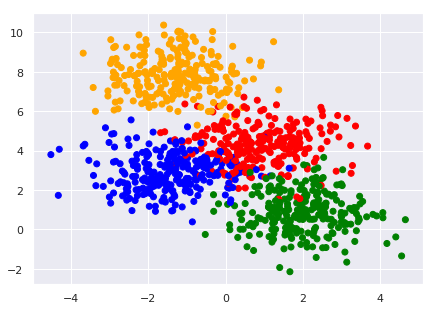

In [0]:
sb.set()
plt.figure(figsize = (7,5))
plt.scatter(data[:,0], data[:,1], cmap = my_cmap, c = labels)
plt.show()

In [0]:
X_train, X_val, Y_train, Y_val = map(torch.tensor, (X_train, X_val, Y_train, Y_val))   # converted into torch tensors
print(X_train.shape, Y_val.shape)

torch.Size([750, 2]) torch.Size([250])


In [0]:
def model(x):   # forward_pass
  a1 = torch.matmul(x, w1) + b1 # (N, 2) * (2, 2) -> (N, 2)
  h1 = torch.sigmoid(a1) 
  a2 = torch.matmul(h1, w2) + b2 # (N, 2) * (2, 4) -> (N, 4)  we r building for a 2 neuron then 4 neuron neural network.
  h2 = torch.exp(a2)/torch.exp(a2).sum(-1).unsqueeze(-1)
  return h2

In [0]:
w1 = torch.randn(2,2)/math.sqrt(2)
w2 = torch.randn(2,4)/math.sqrt(2)
b1 = torch.tensor([1.])      
b2 = torch.tensor([1.])
print(w1)                           
model(X_train.float())            # just a random cell to try out model function

tensor([[ 1.0896, -0.2075],
        [-1.5406,  0.4019]])


tensor([[0.1930, 0.2357, 0.2141, 0.3572],
        [0.1919, 0.2392, 0.2091, 0.3598],
        [0.1916, 0.2391, 0.2088, 0.3606],
        ...,
        [0.1952, 0.2386, 0.2134, 0.3528],
        [0.1920, 0.2392, 0.2091, 0.3597],
        [0.1940, 0.2391, 0.2115, 0.3554]])

In [0]:
# this cell is an example for the loss function working in the next cell ->
y_pred = torch.tensor([[0.1, 0.2, 0.3, 0.4], [0.7, 0.2, 0.05, 0.05]])  # predicted y
y = torch.tensor([2, 0])  # original y

# the predicted value at the original index as per one hot vector was calculated by converting y in oh & multiplying oh_y with y_pred but here, use index
-(y_pred[range(y_pred.shape[0]), y]).log().mean()

# for accuracy:
(torch.argmax(y_pred, dim = 1) == y).float().mean()  # 50% accuracy because one is correct

tensor(0.5000)

In [0]:
def log_loss(y_pred, y):
  return (-y_pred[range(y_pred.shape[0]), y].log()).mean()  

In [0]:
def accuracy(y_pred, y):
  return (torch.argmax(y_pred, dim = 1) == y).float().mean().item()

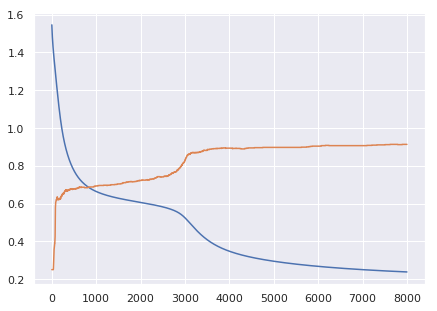

Loss before training: 1.5456441640853882
Loss after training: 0.23840349912643433
CPU times: user 8.16 s, sys: 638 ms, total: 8.8 s
Wall time: 9.24 s


In [0]:
%%time
torch.manual_seed(0)
w1 = torch.randn(2, 2)/math.sqrt(2)  # xavier initialization
w1.requires_grad_()
w2 = torch.randn(2, 4)/math.sqrt(2)
w2.requires_grad_()
b1 = torch.zeros(2, requires_grad=True)
b2 = torch.zeros(4, requires_grad=True)

lr = 0.1
epochs = 8000

X_train = X_train.float()
Y_train = Y_train.long()

loss = {}
acc = {}

for i in tqdm_notebook(range(epochs), unit = 'epochs', total = epochs):
  Y_pred = model(X_train)
  
  loss[i] = log_loss(Y_pred, Y_train)
  loss[i].backward()

  with torch.no_grad():
    w1 -= lr * w1.grad
    b1 -= lr * b1.grad
    w2 -= lr * w2.grad
    b2 -= lr * b2.grad
    w1.grad.zero_()
    w2.grad.zero_()
    b1.grad.zero_()
    b2.grad.zero_()
  
  acc[i] = accuracy(Y_pred, Y_train)

plt.figure(figsize = (7,5))
plt.plot(loss.values())
plt.plot(acc.values())
plt.show()
loss = list(loss.values())  # for accessing first & last elements
print('Loss before training:',loss[0].item())
print('Loss after training:',loss[-1].item())

In [0]:
import torch.nn.functional as F

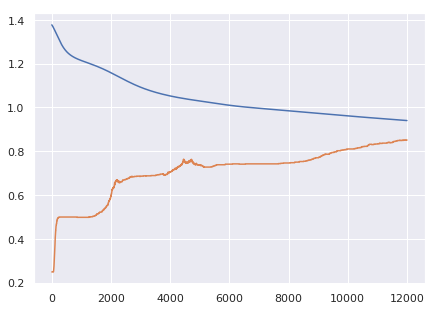

Loss before training: 1.3772168159484863
Loss after training: 0.9403984546661377


In [0]:
w1 = torch.randn(2, 2)/math.sqrt(2)
w1.requires_grad_()
w2 = torch.randn(2, 4)/math.sqrt(2)
w2.requires_grad_()
b1 = torch.zeros(2, requires_grad = True)
b2 = torch.zeros(4, requires_grad = True)

lr = 0.1
epochs = 12000

loss_ = {}
acc_ = {}

for i in tqdm_notebook(range(epochs), unit = 'epochs', total = epochs):
  Y_pred_train = model(X_train)
  loss_[i] = F.cross_entropy(Y_pred_train, Y_train)
  loss_[i].backward()

  with torch.no_grad():
    w1 -= lr * w1.grad
    w2 -= lr * w2.grad
    b1 -= lr * b1.grad
    b2 -= lr * b2.grad
    w1.grad.zero_()
    w2.grad.zero_()
    b1.grad.zero_()
    b2.grad.zero_()

  acc_[i] = accuracy(Y_pred_train, Y_train)

plt.figure(figsize = (7,5))
plt.plot(loss_.values())
plt.plot(acc_.values())
plt.show()

loss_ = list(loss_.values())
print('Loss before training:',loss_[0].item())
print('Loss after training:',loss_[-1].item())

In [0]:
import torch.nn as nn

In [0]:
class FF_Network(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.w1 = nn.Parameter(torch.randn(2, 2)/math.sqrt(2))
    self.b1 = nn.Parameter(torch.zeros(2))
    self.w2 = nn.Parameter(torch.randn(2, 4)/math.sqrt(2))
    self.b2 = nn.Parameter(torch.randn(4))
  
  def forward(self, X):
    a1 = torch.matmul(X, self.w1) + self.b1
    h1 = torch.sigmoid(a1)
    a2 = torch.matmul(h1, self.w2) + self.b2
    h2 = torch.exp(a2)/torch.exp(a2).sum(-1).unsqueeze(-1)
    return h2

In [0]:
def fit(epochs = 10000, lr = 0.1):
  loss_ = {}
  acc_ = {}
  for i in tqdm_notebook(range(epochs), unit = 'epochs', total = epochs):
    Y_pred = fn(X_train)
    loss_[i] = F.cross_entropy(Y_pred, Y_train)

    loss_[i].backward()
    with torch.no_grad():
      for params in fn.parameters():
        params -= lr * params.grad
        params.grad.zero_()
    acc_[i] = accuracy(Y_pred, Y_train)

  plt.plot(loss_.values())
  plt.plot(acc_.values())
  plt.show()
  loss_= list(loss_.values())
  print('Loss before training:',loss_[0].item())
  print('Loss after Training:',loss_[-1].item())

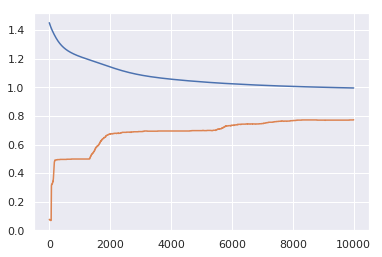

Loss before training: 1.451725721359253
Loss after Training: 0.9955174326896667


In [0]:
fn = FF_Network()
fit()

#Using NN.Linear & Optim


In [0]:
class ffn2(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.lin1 = nn.Linear(2, 2)
    self.lin2 = nn.Linear(2, 4)
  
  def forward(self, X):
    a1 = self.lin1(X)
    h1 = torch.sigmoid(a1)
    a2 = self.lin2(h1)
    h2 = torch.exp(a2)/torch.exp(a2).sum(-1).unsqueeze(-1)
    return h2

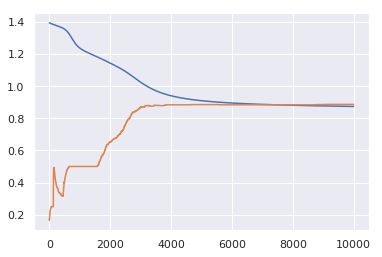

Loss before training: 1.395160436630249
Loss after Training: 0.8738742470741272


In [0]:
fn = ffn2()
fit()

In [0]:
from torch import optim

In [0]:
def fit_v1(epochs = 8000, learning_rate = 1):
  loss_arr = []
  acc_arr = []
  opt = optim.SGD(fn.parameters(), lr=learning_rate)
  
  for epoch in tqdm_notebook(range(epochs), total = epochs, unit = 'epochs'):
    y_hat = fn(X_train)
    loss = F.cross_entropy(y_hat, Y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))

    loss.backward()
    opt.step()
    opt.zero_grad()
        
  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr, 'b-')
  plt.show()      
  print('Loss before training', loss_arr[0])
  print('Loss after training', loss_arr[-1])

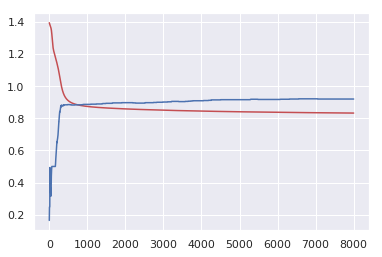

Loss before training 1.395160436630249
Loss after training 0.8325703144073486


In [0]:
fn = ffn2()
fit_v1()

# Using NN.Sequential

In [0]:
class FFN_Sequential(nn.Module):
  def __init__(self):
    super().__init__()
    self.joint = nn.Sequential(
        nn.Linear(2, 2),
        nn.Sigmoid(),
        nn.Linear(2, 4),
        nn.Softmax()
    )
  
  def forward(self, X):
    return self.joint(X)

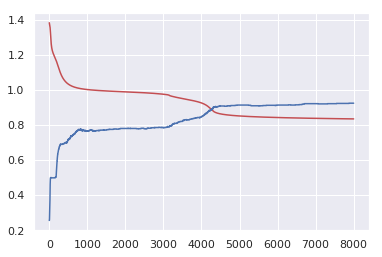

Loss before training 1.3824325799942017
Loss after training 0.8344874382019043


In [0]:
fn = FFN_Sequential()
fit_v1()

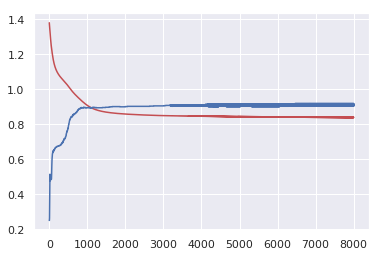

Loss before training 1.3805309534072876
Loss after training 0.8406291604042053
Time take for training: 8.891130447387695


In [0]:
device = torch.device('cpu')
X_train = X_train.to(device)
Y_train = Y_train.to(device)
fn = FFN_Sequential()
fn.to(device)
tic = time.time()
fit_v1()
tac = time.time()
print('Time take for training:',tac-tic)

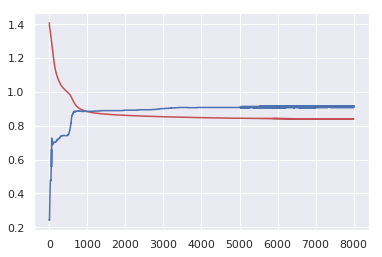

Loss before training 1.409087896347046
Loss after training 0.8383076786994934
Time take for training: 9.938477754592896


In [0]:
device = torch.device('cuda')
X_train = X_train.to(device)
Y_train = Y_train.to(device)
fn = FFN_Sequential()
fn.to(device)
tic = time.time()
fit_v1()
tac = time.time()
print('Time take for training:',tac-tic)